In [ ]:
import os, sys, glob, re
import datetime
import numpy as np
from calendar import monthrange
import h5py

sys.path.insert(0,'/home/wu-jung/code_git/mi-instrument/')
from concat_raw import get_num_days_pings, get_data_from_h5
from echogram_decomp import find_nearest_time_idx

/Users/wujung/anaconda/envs/py27/lib/python2.7/site-packages/matplotlib/__init__.py:1357: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [ ]:
from matplotlib.dates import date2num, num2date
import matplotlib.pyplot as plt
import read_srad


# Set default colormap
plt.rcParams['image.cmap'] = 'jet'

In [6]:
%matplotlib inline

In [7]:
yr = 2017
mn = 8
all_hr = range(24)  # list of all hour: 0-23
all_minutes = range(0,54,2)  # list of all minutes: 1-10
pings_per_day = len(all_hr)*len(all_minutes)
pings_per_hr = len(all_minutes)

In [58]:
pname = '/Volumes/wjlee_apl_3/ooi_zplsc_all_h5/'

# Echogram for August 20

In [59]:
dd = 20

# Get datetime object for all pings
every_ping = [datetime.datetime(yr,mn,dd,hr,minutes,0) \
              for hr in all_hr for minutes in all_minutes]  # UTC time
every_ping = [x+datetime.timedelta(seconds=7*60*60) for x in every_ping]  # adjust to local time

# Open h5 file
f = h5py.File(os.path.join(pname,'CE04OSPS_201708%02d.h5' % dd),'r')

# Get f['data_times'] idx for every hour in all days in the month
all_idx = [find_nearest_time_idx(f['data_times'],pp) for pp in every_ping]
all_idx = np.array(all_idx)  # to allow numpy operation   

# Extract timing and Sv data
notnanidx = np.int_(all_idx[~np.isnan(all_idx)])  # all non-NaN index
data_times = np.empty(all_idx.shape)  # initialize empty array
data_times[~np.isnan(all_idx)] = f['data_times'][notnanidx.tolist()]
Sv_mtx = np.empty((f['Sv'].shape[0],f['Sv'].shape[1],all_idx.shape[0]))
Sv_mtx[:] = np.nan
Sv_mtx[:,:,~np.isnan(all_idx)] = f['Sv'][:,:,notnanidx.tolist()]

# Extract bin size
bin_size = np.copy(f['bin_size'])
#f.close()

In [61]:
# Open h5 file
f = h5py.File(os.path.join(pname,'CE04OSPS_201708%02d.h5' % (dd+1)),'r')

# Get f['data_times'] idx for every hour in all days in the month
all_idx = [find_nearest_time_idx(f['data_times'],pp) for pp in every_ping]
all_idx = np.array(all_idx)  # to allow numpy operation   

# Extract timing and Sv data
notnanidx = np.int_(all_idx[~np.isnan(all_idx)])  # all non-NaN index
data_times[~np.isnan(all_idx)] = f['data_times'][notnanidx.tolist()]
Sv_mtx[:,:,~np.isnan(all_idx)] = f['Sv'][:,:,notnanidx.tolist()]
f.close()

In [62]:
# Set xtick and labels
ping_idx = range(0,24*pings_per_hr,pings_per_hr)
ping_labels = [str(x) for x in range(24)]

In [63]:
Sv_mtx_20 = Sv_mtx
data_times_20 = data_times

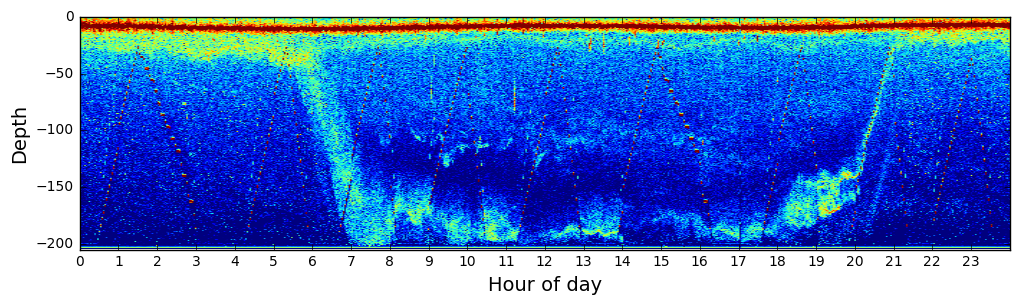

In [64]:
plt.figure(figsize=(12,3))
plt.imshow(Sv_mtx_20[2,:,:],aspect='auto',vmin=-80,vmax=-30,\
          extent=[0,24*pings_per_hr,-bin_size*Sv_mtx_20.shape[1],0])
plt.xticks(ping_idx,ping_labels)
plt.xlabel('Hour of day',fontsize=14)
plt.ylabel('Depth',fontsize=14)

# Echogram for August 21

In [65]:
dd = 21

# Get datetime object for all pings
every_ping = [datetime.datetime(yr,mn,dd,hr,minutes,0) \
              for hr in all_hr for minutes in all_minutes]  # UTC time
every_ping = [x+datetime.timedelta(seconds=7*60*60) for x in every_ping]  # adjust to local time

# Open h5 file
f = h5py.File(os.path.join(pname,'CE04OSPS_201708%02d.h5' % dd),'r')

# Get f['data_times'] idx for every hour in all days in the month
all_idx = [find_nearest_time_idx(f['data_times'],pp) for pp in every_ping]
all_idx = np.array(all_idx)  # to allow numpy operation   

# Extract timing and Sv data
notnanidx = np.int_(all_idx[~np.isnan(all_idx)])  # all non-NaN index
data_times = np.empty(all_idx.shape)  # initialize empty array
data_times[~np.isnan(all_idx)] = f['data_times'][notnanidx.tolist()]
Sv_mtx = np.empty((f['Sv'].shape[0],f['Sv'].shape[1],all_idx.shape[0]))
Sv_mtx[:] = np.nan
Sv_mtx[:,:,~np.isnan(all_idx)] = f['Sv'][:,:,notnanidx.tolist()]
f.close()

In [66]:
# Open h5 file
f = h5py.File(os.path.join(pname,'CE04OSPS_201708%02d.h5' % (dd+1)),'r')

# Get f['data_times'] idx for every hour in all days in the month
all_idx = [find_nearest_time_idx(f['data_times'],pp) for pp in every_ping]
all_idx = np.array(all_idx)  # to allow numpy operation   

# Extract timing and Sv data
notnanidx = np.int_(all_idx[~np.isnan(all_idx)])  # all non-NaN index
data_times[~np.isnan(all_idx)] = f['data_times'][notnanidx.tolist()]
Sv_mtx[:,:,~np.isnan(all_idx)] = f['Sv'][:,:,notnanidx.tolist()]
f.close()

In [67]:
Sv_mtx_21 = Sv_mtx
data_times_21 = data_times

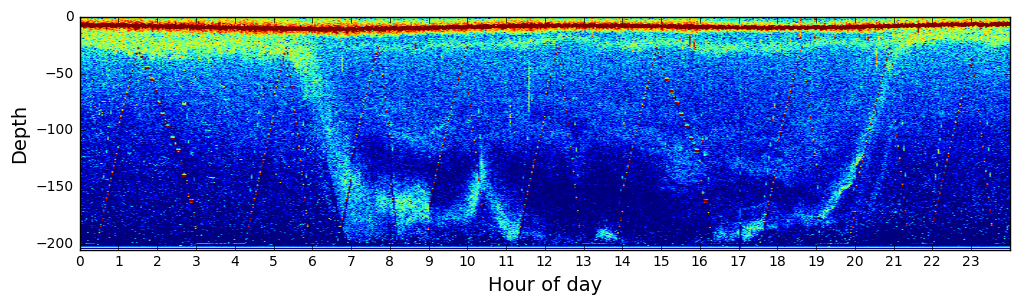

In [68]:
plt.figure(figsize=(12,3))
plt.imshow(Sv_mtx_21[2,:,:],aspect='auto',vmin=-80,vmax=-30,\
          extent=[0,24*pings_per_hr,-bin_size*Sv_mtx_20.shape[1],0])
plt.xticks(ping_idx,ping_labels)
plt.xlabel('Hour of day',fontsize=14)
plt.ylabel('Depth',fontsize=14)

# Echogram for August 22

In [69]:
dd = 22

# Get datetime object for all pings
every_ping = [datetime.datetime(yr,mn,dd,hr,minutes,0) \
              for hr in all_hr for minutes in all_minutes]  # UTC time
every_ping = [x+datetime.timedelta(seconds=7*60*60) for x in every_ping]  # adjust to local time

# Open h5 file
f = h5py.File(os.path.join(pname,'CE04OSPS_201708%02d.h5' % dd),'r')

# Get f['data_times'] idx for every hour in all days in the month
all_idx = [find_nearest_time_idx(f['data_times'],pp) for pp in every_ping]
all_idx = np.array(all_idx)  # to allow numpy operation   

# Extract timing and Sv data
notnanidx = np.int_(all_idx[~np.isnan(all_idx)])  # all non-NaN index
data_times = np.empty(all_idx.shape)  # initialize empty array
data_times[~np.isnan(all_idx)] = f['data_times'][notnanidx.tolist()]
Sv_mtx = np.empty((f['Sv'].shape[0],f['Sv'].shape[1],all_idx.shape[0]))
Sv_mtx[:] = np.nan
Sv_mtx[:,:,~np.isnan(all_idx)] = f['Sv'][:,:,notnanidx.tolist()]
f.close()

# Open h5 file
f = h5py.File(os.path.join(pname,'CE04OSPS_201708%02d.h5' % (dd+1)),'r')

# Get f['data_times'] idx for every hour in all days in the month
all_idx = [find_nearest_time_idx(f['data_times'],pp) for pp in every_ping]
all_idx = np.array(all_idx)  # to allow numpy operation   

# Extract timing and Sv data
notnanidx = np.int_(all_idx[~np.isnan(all_idx)])  # all non-NaN index
data_times[~np.isnan(all_idx)] = f['data_times'][notnanidx.tolist()]
Sv_mtx[:,:,~np.isnan(all_idx)] = f['Sv'][:,:,notnanidx.tolist()]
f.close()

In [70]:
Sv_mtx_22 = Sv_mtx
data_times_22 = data_times

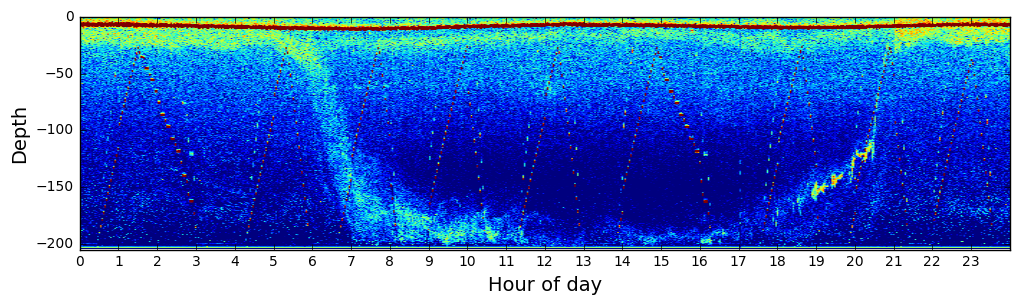

In [71]:
plt.figure(figsize=(12,3))
plt.imshow(Sv_mtx_22[2,:,:],aspect='auto',vmin=-80,vmax=-30,\
          extent=[0,24*pings_per_hr,-bin_size*Sv_mtx_20.shape[1],0])
plt.xticks(ping_idx,ping_labels)
plt.xlabel('Hour of day',fontsize=14)
plt.ylabel('Depth',fontsize=14)

# Solar radiation on August 20-22

In [8]:
import read_srad

In [9]:
srad_path = '/Volumes/wjlee_apl_3/ooi_eao_buoy/'
srad_file = 'eao_buoy_solar_radiation_20170831download.txt'

In [10]:
data = read_srad.read_srad_file(os.path.join(srad_path,srad_file))

In [11]:
data.keys()

['LWRAD', 'MM', '#YY', 'mm', 'hh', 'SRAD1', 'SWRAD', 'DD']

In [12]:
yr = 2017
mn = 8
all_hr = range(24)  # list of all hour: 0-23
all_minutes = range(0,60,10)  # list of all minutes: 1-10
rec_per_day = len(all_hr)*len(all_minutes)
rec_per_hr = len(all_minutes)

In [13]:
dd = 20
# Get datetime object for all pings
every_rec = [datetime.datetime(yr,mn,dd,hr,minutes,0) \
              for hr in all_hr for minutes in all_minutes]  # UTC time
every_rec = [x+datetime.timedelta(seconds=7*60*60) for x in every_rec]  # adjust to local time
# Get timestamp for all radiation records
rec_time = [datetime.datetime(y,m,d,h,mmin,0) for (y,m,d,h,mmin) in zip(data['#YY'],data['MM'],data['DD'],data['hh'],data['mm'])]
rec_time_num = date2num(rec_time)
idx20 = [np.argmin(np.abs(rec_time_num-date2num(x))) for x in every_rec]

In [14]:
dd = 21
# Get datetime object for all pings
every_rec = [datetime.datetime(yr,mn,dd,hr,minutes,0) \
              for hr in all_hr for minutes in all_minutes]  # UTC time
every_rec = [x+datetime.timedelta(seconds=7*60*60) for x in every_rec]  # adjust to local time
# Get timestamp for all radiation records
rec_time = [datetime.datetime(y,m,d,h,mmin,0) for (y,m,d,h,mmin) in zip(data['#YY'],data['MM'],data['DD'],data['hh'],data['mm'])]
rec_time_num = date2num(rec_time)
idx21 = [np.argmin(np.abs(rec_time_num-date2num(x))) for x in every_rec]

In [15]:
dd = 22
# Get datetime object for all pings
every_rec = [datetime.datetime(yr,mn,dd,hr,minutes,0) \
              for hr in all_hr for minutes in all_minutes]  # UTC time
every_rec = [x+datetime.timedelta(seconds=7*60*60) for x in every_rec]  # adjust to local time
# Get timestamp for all radiation records
rec_time = [datetime.datetime(y,m,d,h,mmin,0) for (y,m,d,h,mmin) in zip(data['#YY'],data['MM'],data['DD'],data['hh'],data['mm'])]
rec_time_num = date2num(rec_time)
idx22 = [np.argmin(np.abs(rec_time_num-date2num(x))) for x in every_rec]

In [16]:
# Set xtick and labels
rec_idx = range(0,24*rec_per_hr,rec_per_hr)
rec_labels = [str(x) for x in range(24)]

## Solar radiation comparison in linear scale

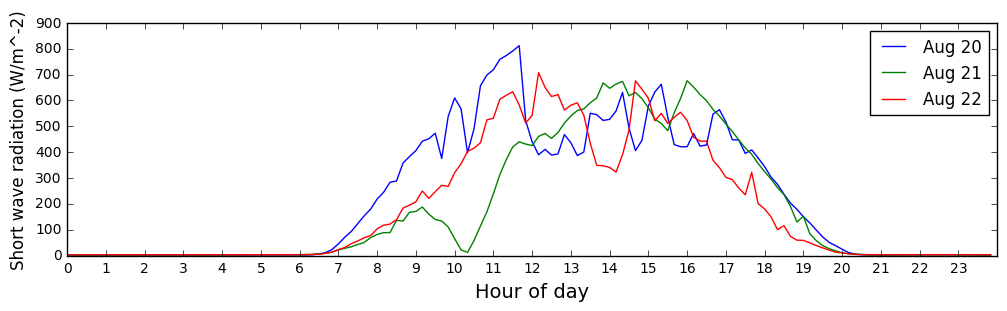

In [24]:
plt.figure(figsize=(12,3))
plt.plot(data['SRAD1'][idx20],label='Aug 20')
plt.plot(data['SRAD1'][idx21],label='Aug 21')
plt.plot(data['SRAD1'][idx22],label='Aug 22')
plt.xticks(rec_idx,rec_labels)
plt.xlim([0,rec_per_hr*24])
plt.legend()
plt.xlabel('Hour of day',fontsize=14)
plt.ylabel('Short wave radiation (W/m^-2)',fontsize=12)

In [18]:
## Solar radiation comparison in log scale

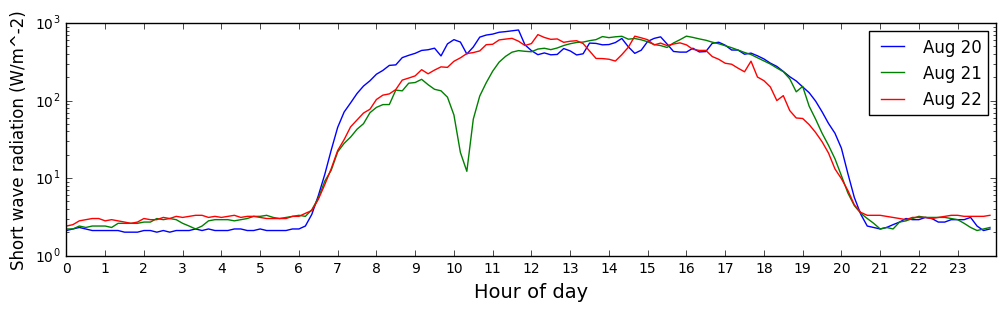

In [23]:
plt.figure(figsize=(12,3))
plt.plot(data['SRAD1'][idx20],label='Aug 20')
plt.plot(data['SRAD1'][idx21],label='Aug 21')
plt.plot(data['SRAD1'][idx22],label='Aug 22')
plt.xticks(rec_idx,rec_labels)
plt.xlim([0,rec_per_hr*24])
plt.yscale('log')
plt.legend()
plt.xlabel('Hour of day',fontsize=14)
plt.ylabel('Short wave radiation (W/m^-2)',fontsize=12)